In [1]:
from experiment.experiment import Experiment
from envs.bandits import BanditFactory
from algorithms.algorithms import AlgorithmFactory

In [2]:
from algorithms.uniform import Uniform

# from algorithms.ecolog import ECOLOG
# from algorithms.max_uncertainty import MaxUncertainty
from algorithms.lucb import LUCB
from algorithms.ecots import EcoTS

from envs.guassian_bandit import GuassianBandit
from envs.adv4_bandit import Adv4Bandit

In [6]:
uniform_factory = AlgorithmFactory(Uniform, "uniform", [])
lucb_factory_1 = AlgorithmFactory(LUCB, "lucb 1", ["param_norm_ub"], inflation=1)
lucb_factory_01 = AlgorithmFactory(LUCB, "lucb 0.1", ["param_norm_ub"], inflation=0.1)
lucb_factory_001 = AlgorithmFactory(
    LUCB, "lucb 0.01", ["param_norm_ub"], inflation=0.01
)
lucb_factory_0001 = AlgorithmFactory(
    LUCB, "lucb 0.001", ["param_norm_ub"], inflation=0.001
)
lucb_factory_00001 = AlgorithmFactory(
    LUCB, "lucb 0.0001", ["param_norm_ub"], inflation=0.0001
)

guassian_factory = BanditFactory(
    GuassianBandit,
    "guassian",
    n_arms=20,
    n_contexts=20,
    d=15,
    fit_into_unit_ball=True,
)
adv_factory = BanditFactory(
    Adv4Bandit,
    "needle",
    n_arms=70,
    n_contexts=400,
    d=30,
    fit_into_unit_ball=True,
)
experiment = Experiment(
    [
        adv_factory,
        guassian_factory,
    ],
    [
        uniform_factory,
        lucb_factory_1,
        lucb_factory_01,
        lucb_factory_001,
        lucb_factory_0001,
        lucb_factory_00001,
    ],
)

In [7]:
from experiment.simple_regret import SimpleRegret

simple_regret_callback = SimpleRegret(interval=100)
experiment.add_callback(simple_regret_callback)

Finished run 1 of 10 for needle in 26.282022953033447 seconds
Finished run 2 of 10 for needle in 52.36422872543335 seconds
Finished run 3 of 10 for needle in 77.59297680854797 seconds
Finished run 4 of 10 for needle in 103.4733338356018 seconds
Finished run 5 of 10 for needle in 128.15273189544678 seconds
Finished run 6 of 10 for needle in 154.53847980499268 seconds
Finished run 7 of 10 for needle in 179.58453178405762 seconds
Finished run 8 of 10 for needle in 204.86648869514465 seconds
Finished run 9 of 10 for needle in 229.47786808013916 seconds
Finished run 10 of 10 for needle in 254.59256196022034 seconds
Finished run 1 of 10 for guassian in 258.987007856369 seconds
Finished run 2 of 10 for guassian in 263.1388328075409 seconds
Finished run 3 of 10 for guassian in 267.2520067691803 seconds
Finished run 4 of 10 for guassian in 271.3087396621704 seconds
Finished run 5 of 10 for guassian in 275.3235318660736 seconds
Finished run 6 of 10 for guassian in 279.3305358886719 seconds
Finis

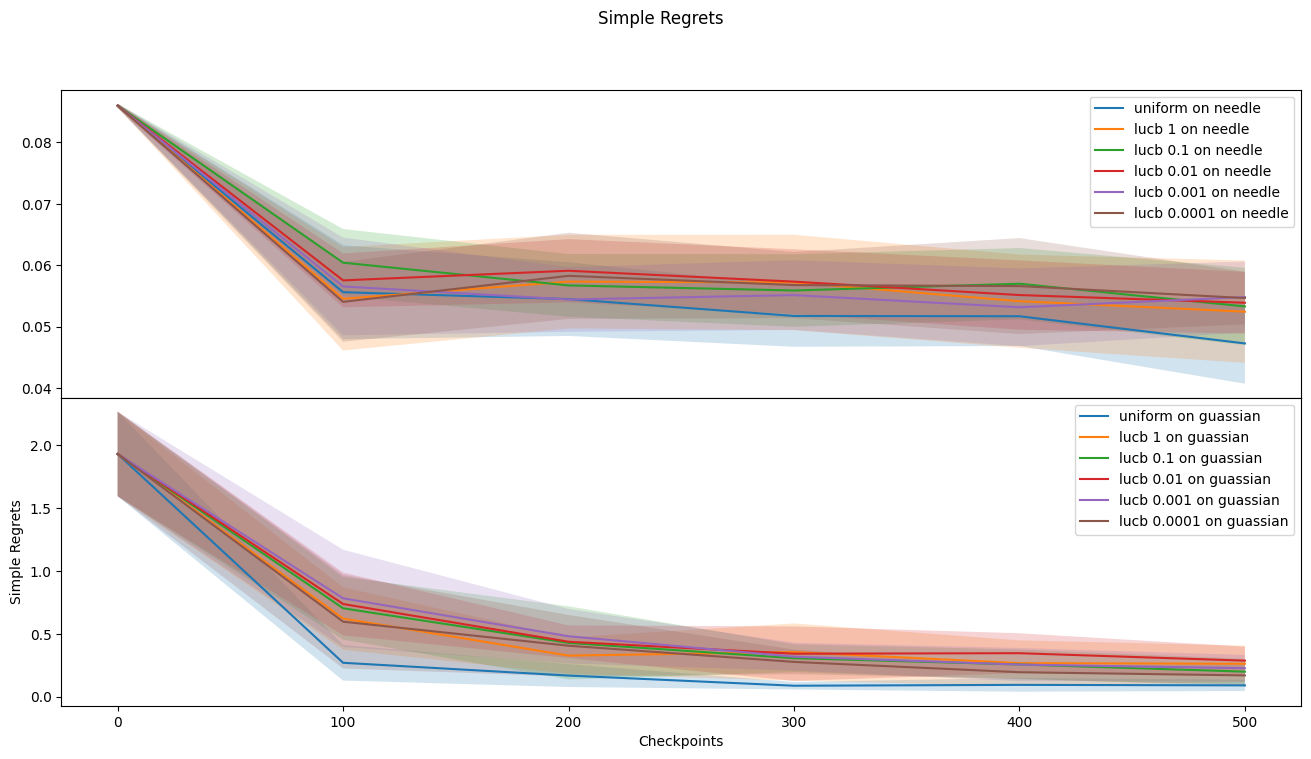

In [8]:
experiment.interact(n_steps=500, n_runs=10, log_progress=True)